# European High-Income Countries Data Analysis


## Contents of the Notebook:

#### Part 1: Crawling a real-world dataset

#### Part 2: Data preparation & cleaning

#### Part 3: Exploratory analysis

#### Part 4: In-Depth analysis

#### Part 5: Summary


In [1]:
# Initial Setup:
# Import all the libraries we need

import requests
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Part 1: Crawling a real-world dataset

In [2]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [3]:
import wbgapi as wb

In [4]:
european_countries = ['AND', 'AUT', 'BEL', 'BMU', 'CHI', 'CYP', 'CZE', 'DNK', 'EST', 'FRO', 
                      'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GRL', 'GGY', 'HUN', 'ISL', 'IRL', 
                      'IMN', 'ITA', 'JEY', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MCO', 'NLD', 
                      'NOR', 'POL', 'PRT', 'SMR', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'GBR']
indicators = ['NY.GDP.PCAP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GNP.PCAP.CD', 'SP.POP.TOTL', 
              'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'DT.DOD.DECT.CD', 'HD.HCI.OVRL']

# Fetch data for the last 20 years
df = wb.data.DataFrame(indicators, european_countries, mrv=20)
df = df.reset_index()

# Reorganizing the data to have the desired columns
df_cleaned = df.melt(id_vars=["economy", "series"], var_name="Year", value_name="Value")

# Creating a pivot table to reshape the data
data = df_cleaned.pivot_table(index=["economy", "Year"], columns="series", values="Value").reset_index()

# Renaming the columns for better readability
column_names = {
    "economy": "Country",
    "NY.GDP.PCAP.CD": "GDP per Capita (Current US$)",
    "NY.GDP.MKTP.KD.ZG": "GDP Growth (Annual %)",
    "NY.GNP.PCAP.CD": "GNI per capita (Current US$)",
    "SP.POP.TOTL": "Total Population",
    "SL.UEM.TOTL.ZS": "Unemployment Rate (Total % of Total Labor Force)",
    "FP.CPI.TOTL.ZG": "Inflation, Consumer Prices (Annual %)",
    "FI.RES.TOTL.DT.ZS": "Total Reserves (% of Total External Debt)",
    "HD.HCI.OVRL": "Human Capital Index"
}

data.rename(columns=column_names, inplace=True)



In [6]:
# Save to CSV
data.to_csv('european_high_income_countries_data.csv', index=False)

In [7]:
data.head()

series,Country,Year,"Inflation, Consumer Prices (Annual %)",Human Capital Index,GDP Growth (Annual %),GDP per Capita (Current US$),GNI per capita (Current US$),Unemployment Rate (Total % of Total Labor Force),Total Population
0,AND,YR2003,NaN,NaN,8.694204,31954.161787,NaN,NaN,73907.0
1,AND,YR2004,NaN,NaN,8.135676,37630.764264,NaN,NaN,76933.0
2,AND,YR2005,NaN,NaN,5.397796,39583.931194,NaN,NaN,79826.0
3,AND,YR2006,NaN,NaN,4.808689,43084.283724,NaN,NaN,80221.0
4,AND,YR2007,NaN,NaN,1.553188,50562.826605,NaN,NaN,78168.0


This dataset is sourced from the World Bank, specifically using the World Bank Group’s API through the wbgapi Python library. The dataset includes the following key indicators for various European high-income countries:

GDP per Capita (Current US$) - NY.GDP.PCAP.CD: GDP per Capita is a measure of a country's economic performance adjusted for its population size. Expressed in current U.S. dollars, it accounts for inflation and provides a snapshot of the average economic prosperity or wealth of each citizen in a given year.

GDP Growth (Annual %) - NY.GDP.MKTP.KD.ZG: This indicator represents the annual percentage growth rate of GDP at market prices based on constant local currency.

GNI per capita (Current US$) - NY.GNP.PCAP.CD: Gross National Income per capita in current U.S. dollars. It reflects the average income of a country's citizens.

Total Population - SP.POP.TOTL: The total population of the country, regardless of legal status or citizenship.

Unemployment Rate (Total % of Total Labor Force) - SL.UEM.TOTL.ZS: This measures the number of people who are unemployed and are actively looking for work as a percentage of the labor force.

Inflation, Consumer Prices (Annual %) - FP.CPI.TOTL.ZG: The rate of price change in the economy as a whole, reflecting the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services.

Total Reserves (% of Total External Debt) - FI.RES.TOTL.DT.ZS: This indicator shows a country's reserves expressed as a percentage of its total external debt.

Human Capital Index - HD.HCI.OVRL: This index measures the amount of human capital that a child born today can expect to attain by age 18.

## Part 2: Data preparation & cleaning

### Handling missing data

In [8]:
data.isnull().sum() #checking for total null values

series
Country                                               0
Year                                                  0
Inflation, Consumer Prices (Annual %)               186
Human Capital Index                                 648
GDP Growth (Annual %)                                58
GDP per Capita (Current US$)                         34
GNI per capita (Current US$)                        139
Unemployment Rate (Total % of Total Labor Force)    180
Total Population                                      0
dtype: int64

In order to decide which approach to use to handle missing values, I will see which country has the most missing values for each column.

In [9]:
data.isnull().groupby(data['Country']).sum()

series,Country,Year,"Inflation, Consumer Prices (Annual %)",Human Capital Index,GDP Growth (Annual %),GDP per Capita (Current US$),GNI per capita (Current US$),Unemployment Rate (Total % of Total Labor Force),Total Population
Country,,,,,,,,,
AND,0,0,20,20,0,0,17,20,0
AUT,0,0,0,16,0,0,0,0,0
BEL,0,0,0,16,0,0,0,0,0
BMU,0,0,20,20,0,0,7,20,0
CHE,0,0,0,16,0,0,0,0,0
CHI,0,0,20,20,15,9,20,0,0
CYP,0,0,0,16,0,0,0,0,0
CZE,0,0,0,16,0,0,0,0,0
DEU,0,0,0,16,0,0,0,0,0


As part of the data cleaning and preparation process for our analysis, I decided to make two modifications to the dataset: 
1) It can be noticed that Human Capital Index Column lacks sufficient data for a significant portion of the dataset, potentially compromising the reliability and robustness of any analysis involving this indicator. Therefore, I made a decision to drop it.
2) I decided to exclude following 10 countries from the dataset: SMR, IMN, BMU, FRO, AND, GRL, MCO, CHI, LIE and GIB. These countries have a high number of missing values across various columns. Retaining these countries in our dataset could introduce biases or inaccuracies in the analysis. 



In [10]:
data_dropped_hci = data.drop(columns=["Human Capital Index"])

In [11]:
data_dropped_hci.head()

series,Country,Year,"Inflation, Consumer Prices (Annual %)",GDP Growth (Annual %),GDP per Capita (Current US$),GNI per capita (Current US$),Unemployment Rate (Total % of Total Labor Force),Total Population
0,AND,YR2003,NaN,8.694204,31954.161787,NaN,NaN,73907.0
1,AND,YR2004,NaN,8.135676,37630.764264,NaN,NaN,76933.0
2,AND,YR2005,NaN,5.397796,39583.931194,NaN,NaN,79826.0
3,AND,YR2006,NaN,4.808689,43084.283724,NaN,NaN,80221.0
4,AND,YR2007,NaN,1.553188,50562.826605,NaN,NaN,78168.0


In [12]:
countries_to_drop = ['SMR', 'IMN', 'BMU', 'FRO', 'AND', 'GRL', 'MCO', 'CHI', 'LIE', 'GIB']
mask = ~data_dropped_hci['Country'].isin(countries_to_drop)
data_cleaned = data_dropped_hci[mask]

In [13]:
data_cleaned.isnull().groupby(data['Country']).sum()

series,Country,Year,"Inflation, Consumer Prices (Annual %)",GDP Growth (Annual %),GDP per Capita (Current US$),GNI per capita (Current US$),Unemployment Rate (Total % of Total Labor Force),Total Population
Country,,,,,,,,
AUT,0,0,0,0,0,0,0,0
BEL,0,0,0,0,0,0,0,0
CHE,0,0,0,0,0,0,0,0
CYP,0,0,0,0,0,0,0,0
CZE,0,0,0,0,0,0,0,0
DEU,0,0,0,0,0,0,0,0
DNK,0,0,0,0,0,0,0,0
ESP,0,0,0,0,0,0,0,0
EST,0,0,0,0,0,0,0,0


Given that Greece (GRC) is missing only three data points for the "GNI per capita (Current US$)" column, I will impute the missing data. If the data is normally distributed without outliers I will impute data with mean values, or else, with median values.

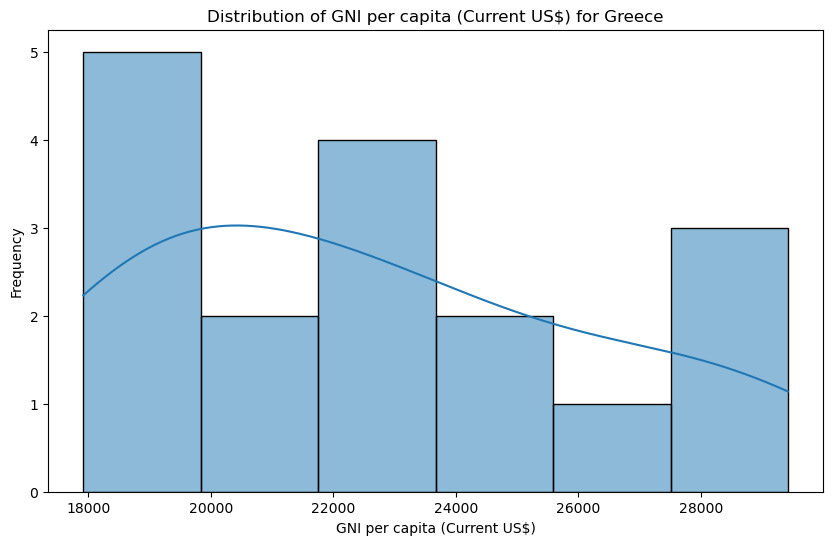

In [14]:
gni_greece = data_cleaned[data_cleaned['Country']=='GRC']['GNI per capita (Current US$)'].dropna()
# Plotting the distribution of GNI per capita for Greece
plt.figure(figsize=(10, 6))
sns.histplot(gni_greece, kde=True)
plt.title('Distribution of GNI per capita (Current US$) for Greece')
plt.xlabel('GNI per capita (Current US$)')
plt.ylabel('Frequency')
plt.show()

Since the data is not normally distributed, and since the median is less sensitive to outliers and skewed distributions compared to the mean I will impute data with median values.

In [15]:
median_gni_greece = data_cleaned[data_cleaned['Country']=='GRC']['GNI per capita (Current US$)'].median()

In [16]:
data_cleaned.loc[(data_cleaned['Country'] == 'GRC') & (data_cleaned['GNI per capita (Current US$)'].isnull()), 'GNI per capita (Current US$)'] = median_gni_greece

In [17]:
data_cleaned.isnull().sum()

series
Country                                             0
Year                                                0
Inflation, Consumer Prices (Annual %)               0
GDP Growth (Annual %)                               0
GDP per Capita (Current US$)                        0
GNI per capita (Current US$)                        0
Unemployment Rate (Total % of Total Labor Force)    0
Total Population                                    0
dtype: int64

After cleaning the data from null datapoints we need to address the outliers in the data. The box plots will be applied for this purpose. 

### Handling outliers

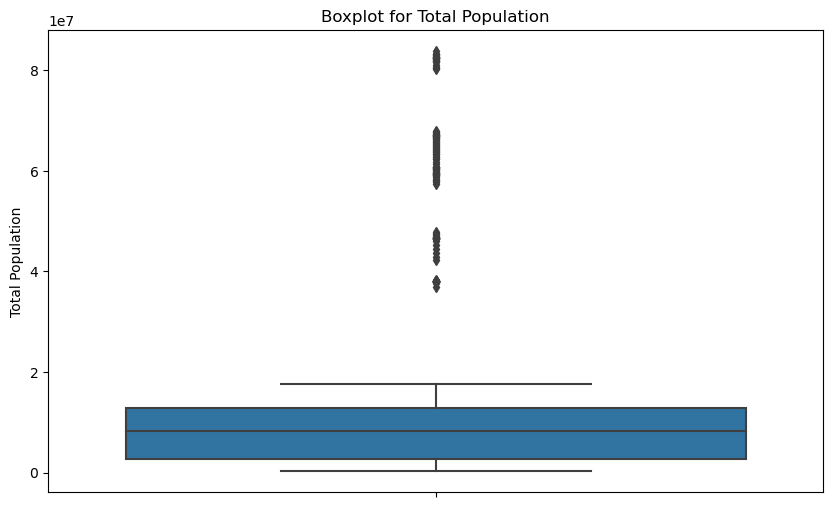

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data_cleaned['Total Population'])
plt.xticks(rotation=45)
plt.title('Boxplot for Total Population')
plt.show()

In [19]:
def outlier_details(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [20]:
population_outliers = outlier_details(data_cleaned, 'Total Population')
population_outliers[['Country','Year', 'Total Population']]

series,Country,Year,Total Population
160,DEU,YR2003,82534176.0
161,DEU,YR2004,82516260.0
162,DEU,YR2005,82469422.0
163,DEU,YR2006,82376451.0
164,DEU,YR2007,82266372.0
...,...,...,...
655,POL,YR2018,37974750.0
656,POL,YR2019,37965475.0
657,POL,YR2020,37899070.0
658,POL,YR2021,37747124.0


The central box, which represents IQR is narrow, which suggests that the central half of the data points are relatively close to each other in value.

The line within the box represents the median of the data. It seems to be closer to the bottom of the box, which might indicate that the data is slightly skewed towards lower population sizes.
The upper whisker seems to be quite long, suggesting that there are countries with populations significantly larger than the median.

The individual points above the upper whisker are outliers. These points represent countries with exceptionally large populations compared to other countries in the dataset.

Considering that population sizes can vary greatly between countries, with populous nations like France, Germany and United Kingdom, these outliers are likely not errors but rather reflect the actual population distribution across different nations.

In the process of handling outliers in population size my analysis, I encountered 2 decisions: 

1) Keeping All Countries, Regardless of Population Size: this way the analysis remains relevant to the actual global economic landscape, as it includes both populous and less populous nations. However, larger countries might disproportionately influence the results of the analysis, especially in non-per capita measures.
2) Applying a Logarithmic Transformation to Population: Log transformation can reduce the skewness of the population distribution and mitigates influence of outliers. However, while the transformation controls for outliers, it may mask the real-world differences between countries with vastly different population sizes.

After thorough consideration, the choice was made to retain the complete set of countries in the analysis, regardless of population size, rather than applying a logarithmic transformation to the population data. By including all countries, the analysis benefits from a representative sample of the global economies, which is critical for drawing generalizable conclusions across a diverse range of economies.



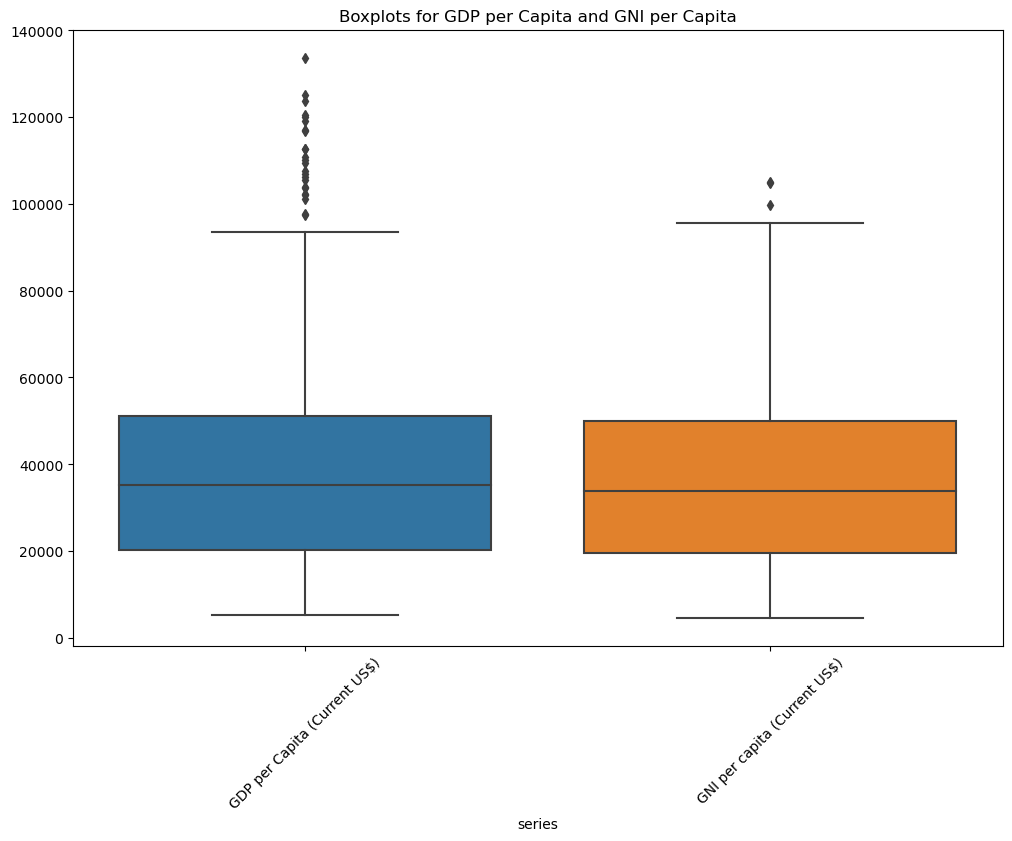

In [21]:
numeric_columns = ['GDP per Capita (Current US$)',
                   'GNI per capita (Current US$)']

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplots for GDP per Capita and GNI per Capita')
plt.show()

GDP per Capita (Current US$): The median is visible in the blue box, indicating a central tendency, but there is a wide range of values, as indicated by the long whiskers. There are several outliers above the top whisker, indicating countries with exceptionally high GDP per capita.

GNI per capita (Current US$): The orange box showing GNI per capita also has a long range, with a slightly higher median compared to GDP per capita. There are outliers as well, but not as many as for GDP per capita. The distribution of GNI per capita appears more narrow than that of GDP per capita, suggesting less variance among the observed countries.

To address the existing outliers applying a logarithmic transformation to GDP per Capita or GNI per Capita can be particularly useful. Economic data, including GDP and GNI per capita, often have a right-skewed distribution, where a few high-income countries have values much larger than the rest. A logarithmic transformation can help reduce this skewness. Moreover, high-income countries as Luxemburg, Norway and etc. can disproportionately affect the mean and other statistics. The logarithmic scale reduces effect of outliers. Before applying logarithmic transformation I need to make sure there are no 0 and negative values. 

In [22]:
description = data_cleaned.describe()

# Formatting the numbers in the DataFrame to avoid scientific notation
description_styled = description.style.format("{:.2f}")

description_styled

series,"Inflation, Consumer Prices (Annual %)",GDP Growth (Annual %),GDP per Capita (Current US$),GNI per capita (Current US$),Unemployment Rate (Total % of Total Labor Force),Total Population
count,560.00,560.00,560.00,560.00,560.00,560.00
mean,2.39,2.23,39497.60,37553.68,7.75,17415334.85
std,2.70,3.88,24407.57,21400.32,4.20,23124681.40
min,-4.48,-14.84,5145.20,4670.00,2.01,289521.00
25%,0.86,0.90,20222.47,19455.00,4.85,2667591.50
50%,1.95,2.36,35224.44,33780.00,6.83,8353363.50
75%,3.04,4.11,51037.04,49940.00,8.88,12820686.00
max,19.71,24.48,133711.79,105070.00,27.47,83797985.00


In [23]:
data_cleaned['Log GDP per Capita (Current US$)'] = np.log(data_cleaned['GDP per Capita (Current US$)'])
data_cleaned['Log GNI per capita (Current US$)'] = np.log(data_cleaned['GNI per capita (Current US$)'])

/var/folders/kh/9f_qbyz50xx8zspmkv7h_4f40000gn/T/ipykernel_24062/4113126071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Log GDP per Capita (Current US$)'] = np.log(data_cleaned['GDP per Capita (Current US$)'])
/var/folders/kh/9f_qbyz50xx8zspmkv7h_4f40000gn/T/ipykernel_24062/4113126071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Log GNI per capita (Current US$)'] = np.log(data_cleaned['GNI per capita (Current US$)'])


In [24]:
data_cleaned.head()

series,Country,Year,"Inflation, Consumer Prices (Annual %)",GDP Growth (Annual %),GDP per Capita (Current US$),GNI per capita (Current US$),Unemployment Rate (Total % of Total Labor Force),Total Population,Log GDP per Capita (Current US$),Log GNI per capita (Current US$)
20,AUT,YR2003,1.355554,0.941471,32294.048861,28100.0,4.78,8121423.0,10.382638,10.243525
21,AUT,YR2004,2.061206,2.735120,36889.233514,33850.0,5.83,8171966.0,10.515675,10.429694
22,AUT,YR2005,2.299138,2.244065,38417.457786,38770.0,5.63,8227829.0,10.556267,10.565402
23,AUT,YR2006,1.441549,3.454042,40669.326959,41500.0,5.24,8268641.0,10.613229,10.633449
24,AUT,YR2007,2.168555,3.727415,46915.337400,44540.0,4.86,8295487.0,10.756100,10.704143


In [25]:
# Inspect the first few rows
print("First few rows with log-transformed columns:")
print(data_cleaned[['GDP per Capita (Current US$)', 'Log GDP per Capita (Current US$)',
                    'GNI per capita (Current US$)', 'Log GNI per capita (Current US$)']].head())

First few rows with log-transformed columns:
series  GDP per Capita (Current US$)  Log GDP per Capita (Current US$)  \
20                      32294.048861                         10.382638   
21                      36889.233514                         10.515675   
22                      38417.457786                         10.556267   
23                      40669.326959                         10.613229   
24                      46915.337400                         10.756100   

series  GNI per capita (Current US$)  Log GNI per capita (Current US$)  
20                           28100.0                         10.243525  
21                           33850.0                         10.429694  
22                           38770.0                         10.565402  
23                           41500.0                         10.633449  
24                           44540.0                         10.704143  


In [26]:
# Manually compute and compare a log value
sample_row = data_cleaned.iloc[0:5]  # Taking the first row as an example
manual_log_gdp = np.log(sample_row['GDP per Capita (Current US$)'])
print("\nManually computed log GDP per Capita:", manual_log_gdp)
print("Log GDP per Capita from DataFrame:", sample_row['Log GDP per Capita (Current US$)'])


Manually computed log GDP per Capita: 20    10.382638
21    10.515675
22    10.556267
23    10.613229
24    10.756100
Name: GDP per Capita (Current US$), dtype: float64
Log GDP per Capita from DataFrame: 20    10.382638
21    10.515675
22    10.556267
23    10.613229
24    10.756100
Name: Log GDP per Capita (Current US$), dtype: float64


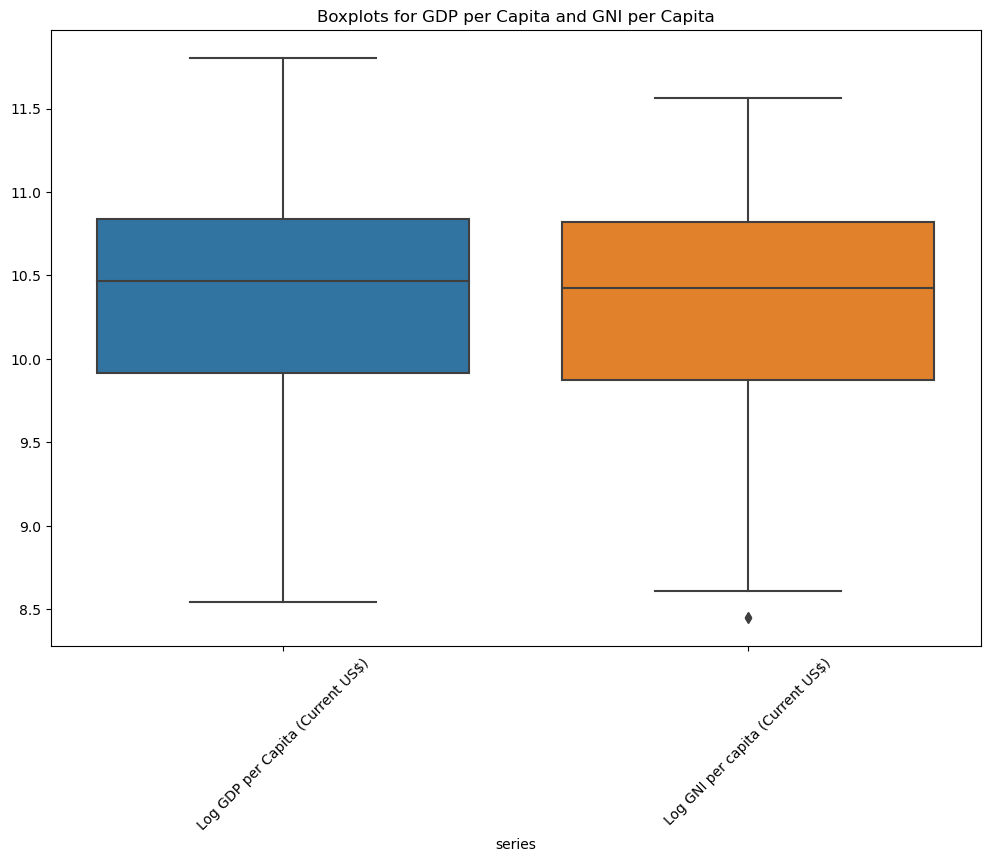

In [27]:
numeric_columns = ['Log GDP per Capita (Current US$)',
                   'Log GNI per capita (Current US$)']

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplots for GDP per Capita and GNI per Capita')
plt.show()

Logarithmic transformations were successful and everything is in order with my data now.

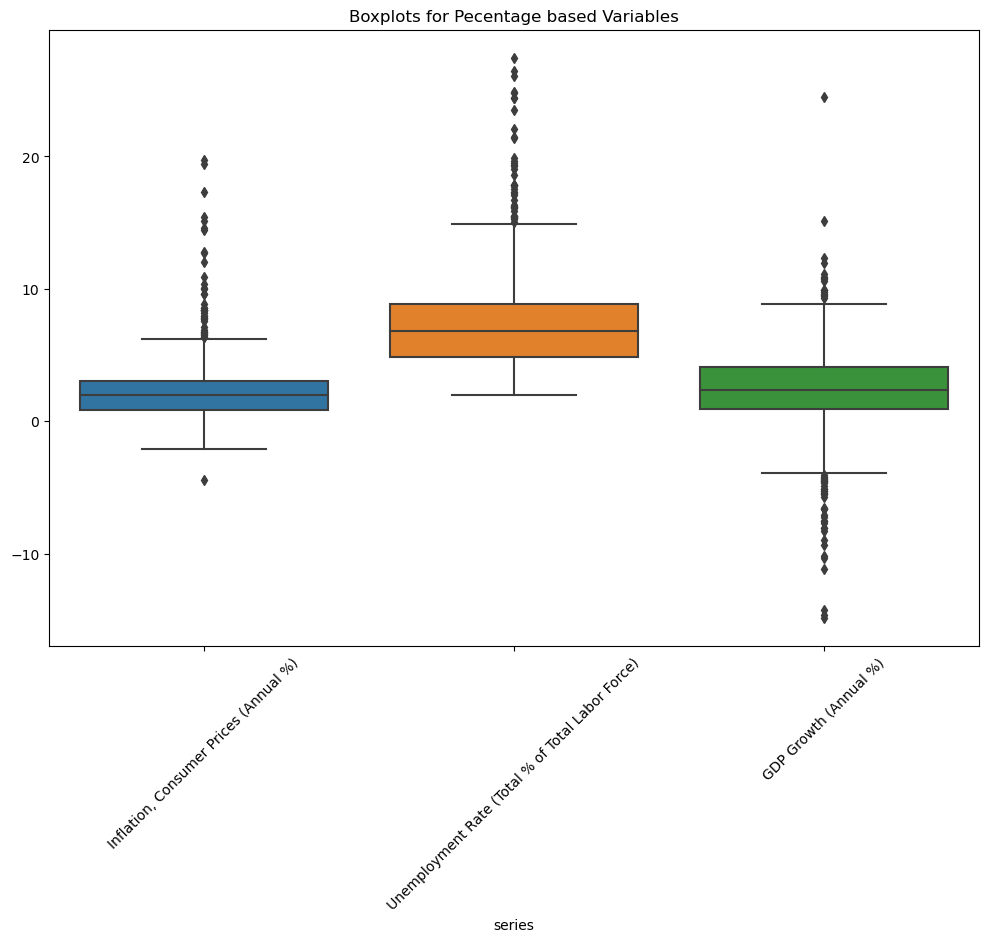

In [28]:
percentage_columns = ['Inflation, Consumer Prices (Annual %)',
                      'Unemployment Rate (Total % of Total Labor Force)',
                       'GDP Growth (Annual %)']

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[percentage_columns])
plt.xticks(rotation=45)
plt.title('Boxplots for Pecentage based Variables')
plt.show()

Due to a vast amount of outliers in these 3 colums, a decision was made to create separate box plots by year. This approach stems from a recognition of the dynamic nature of economies, which can be influenced by global events. 

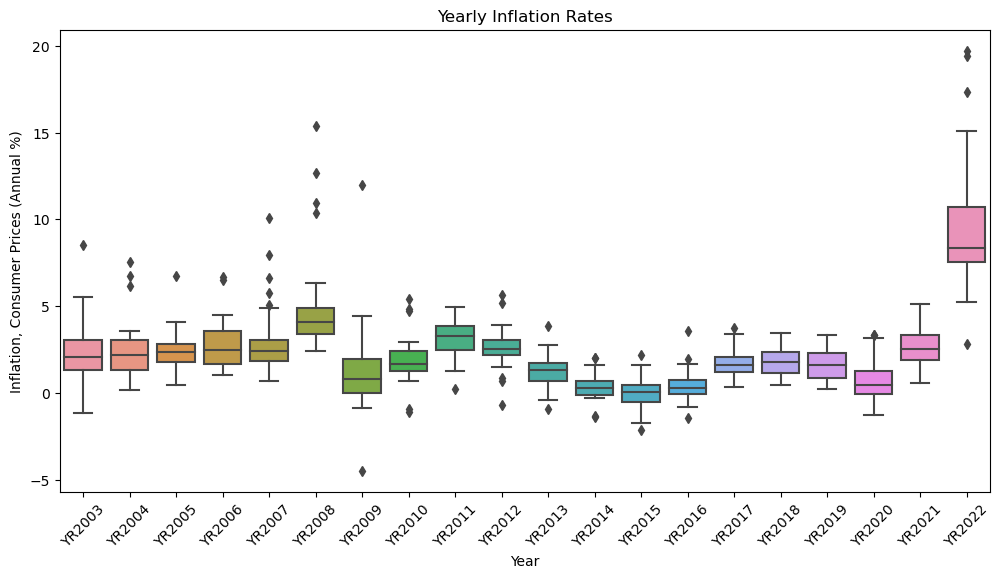

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Inflation, Consumer Prices (Annual %)', data=data_cleaned)
plt.xticks(rotation=45)
plt.title('Yearly Inflation Rates')
plt.show()

The range of inflation rates (from the lowest to the highest) generally expands in the later years, with the box for 2022 showing a particularly large range, suggesting increased variability among countries' inflation rates in that year. The presence of outliers in specific years could be explained by global events as as the financial crisis of 2008 or the recent pandemic. 

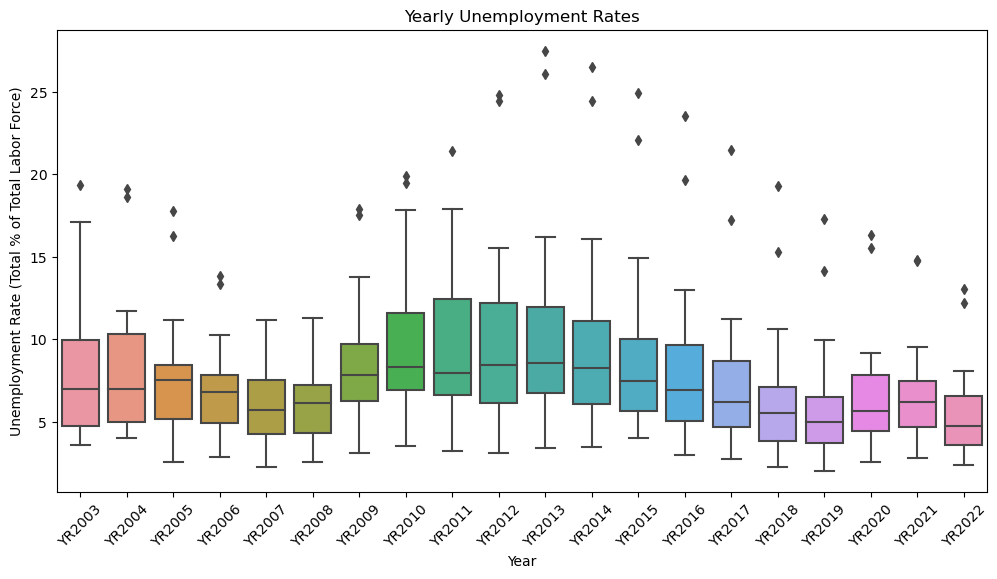

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Unemployment Rate (Total % of Total Labor Force)', data=data_cleaned)
plt.xticks(rotation=45)
plt.title('Yearly Unemployment Rates')
plt.show()

The spread of unemployment rates (as indicated by the IQR) varies from year to year. Some years show a more compact IQR, suggesting a closer clustering of unemployment rates among the countries, whereas other years show a wider IQR, indicating a greater disparity.

The outliers in this box plot, especially during years known for economic downturns, would likely not be considered anomalies but rather significant data points that reflect the impact of global and regional economic challenges. Keeping these outliers in the analysis could provide valuable insights into the resilience or vulnerability of labor markets in different countries and at different times. However, the outliers require closer inspection as they might be concentrated in certain countries.

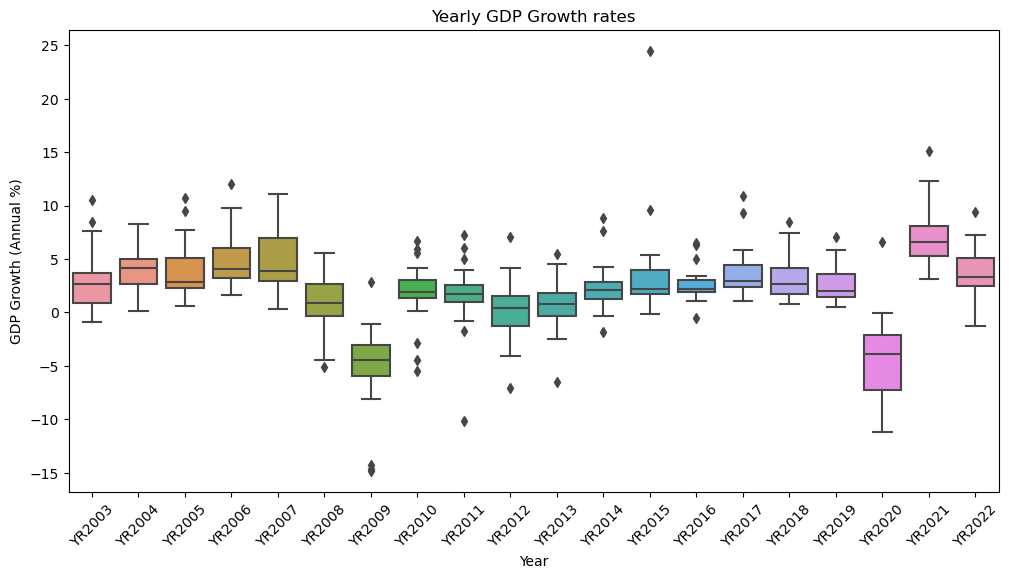

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='GDP Growth (Annual %)', data=data_cleaned)
plt.xticks(rotation=45)
plt.title('Yearly GDP Growth rates')
plt.show()

Certain years show a number of countries with negative GDP growth, which is indicative of economic recessions or slowdowns. For instance, 2008 and 2020 years. The presence of outliers on both the upper and lower sides of the box plots suggests that some countries experienced high growth or significant contractions relative to others. However, the outliers require closer inspection as they might be concentrated in certain countries in certain years.

In [32]:
inflation_outliers = outlier_details(data_cleaned, 'Inflation, Consumer Prices (Annual %)')
inflation_outliers[['Country','Year', 'Inflation, Consumer Prices (Annual %)']]

series,Country,Year,"Inflation, Consumer Prices (Annual %)"
39,AUT,YR2022,8.546870
59,BEL,YR2022,9.597512
139,CYP,YR2022,8.395483
145,CZE,YR2008,6.358664
159,CZE,YR2022,15.100165
179,DEU,YR2022,6.872574
199,DNK,YR2022,7.696567
219,ESP,YR2022,8.390576
224,EST,YR2007,6.601326
225,EST,YR2008,10.362358


Many countries experienced high inflation rates in 2022, indicative of a regional or global trend. Some countries had exceptionally high inflation rates in 2022, such as Estonia (19.40%), Lithuania (19.71%), and Latvia (17.31%). This suggests more acute inflationary pressures in these economies. There are notable instances of high inflation in years prior to 2022, such as Latvia (15.40%) and Iceland (12.69%) in 2008, and Iceland again in 2009 (12.00%). These instances could be related to specific economic events or crises in those years.

In [33]:
unemployment_outliers = outlier_details(data_cleaned, 'Unemployment Rate (Total % of Total Labor Force)')
unemployment_outliers[['Country','Year', 'Unemployment Rate (Total % of Total Labor Force)']]

series,Country,Year,Unemployment Rate (Total % of Total Labor Force)
130,CYP,YR2013,15.87
131,CYP,YR2014,16.09
206,ESP,YR2009,17.86
207,ESP,YR2010,19.86
208,ESP,YR2011,21.39
209,ESP,YR2012,24.79
210,ESP,YR2013,26.09
211,ESP,YR2014,24.44
212,ESP,YR2015,22.06
213,ESP,YR2016,19.64


Spain and Greece experienced a dramatic increase in unemployment rates following the 2008 global financial crisis, peaking in 2013, which also alligns with the times of European Debt crisis. 

The data highlights the severe impact of the global financial crisis (2008) and the European debt crisis on labor markets, leading to high unemployment rates in several countries.

In [34]:
gdp_outliers = outlier_details(data_cleaned, 'GDP Growth (Annual %)')
gdp_outliers[['Country','Year', 'GDP Growth (Annual %)']]

series,Country,Year,GDP Growth (Annual %)
37,AUT,YR2020,-6.632991
57,BEL,YR2020,-5.260779
130,CYP,YR2013,-6.553078
138,CYP,YR2021,9.911308
146,CZE,YR2009,-4.657331
157,CZE,YR2020,-5.502968
166,DEU,YR2009,-5.693836
186,DNK,YR2009,-4.906548
217,ESP,YR2020,-11.167298
222,EST,YR2005,9.526427


The data reflect the cyclical nature of economies, with periods of rapid growth followed by contractions. The financial crisis and the COVID-19 pandemic had a significant and widespread impact on European economies. The data also highlight the importance of country-specific factors, such as policy decisions, economic structure, and external economic influences.

The outliers in these box columns, especially during years known for economic downturns, would likely not be considered anomalies but rather significant data points that reflect the impact of global and regional economic challenges. Keeping these outliers in the analysis could provide valuable insights. 

The cleaned dataset, now free of null data points and with addressed outliers, is ready for analysis.

## Part 3:  Exploratory analysis

In [35]:
description = data_cleaned.describe()

# Formatting the numbers in the DataFrame to avoid scientific notation
description_styled = description.style.format("{:.2f}")

description_styled

series,"Inflation, Consumer Prices (Annual %)",GDP Growth (Annual %),GDP per Capita (Current US$),GNI per capita (Current US$),Unemployment Rate (Total % of Total Labor Force),Total Population,Log GDP per Capita (Current US$),Log GNI per capita (Current US$)
count,560.00,560.00,560.00,560.00,560.00,560.00,560.00,560.00
mean,2.39,2.23,39497.60,37553.68,7.75,17415334.85,10.40,10.36
std,2.70,3.88,24407.57,21400.32,4.20,23124681.40,0.63,0.63
min,-4.48,-14.84,5145.20,4670.00,2.01,289521.00,8.55,8.45
25%,0.86,0.90,20222.47,19455.00,4.85,2667591.50,9.91,9.88
50%,1.95,2.36,35224.44,33780.00,6.83,8353363.50,10.47,10.43
75%,3.04,4.11,51037.04,49940.00,8.88,12820686.00,10.84,10.82
max,19.71,24.48,133711.79,105070.00,27.47,83797985.00,11.80,11.56


Inflation, Consumer Prices (Annual percentage):

Ranges from a minimum of -4.48% (which happened in Ireland in 2009) to a maximum of 19.71% (Estonia 2022).
The mean inflation rate is 2.39%, which is close to the target inflation rate for many central banks, but the standard deviation is relatively high at 2.70, indicating variability in inflation rates across different countries or years.


GDP Growth (Annual percentage):

Exhibits significant variability with a minimum of -14.84% (Lithuania 2009), reflecting severe economic contraction in at least one instance.
The maximum growth recorded is 24.48% (Ireland 2015), indicating a period of rapid economic expansion.
The mean growth rate is 2.23%, with a standard deviation of 3.88, suggesting that GDP growth rates are widely dispersed around the mean.


GDP per Capita (Current US dollar) and GNI per capita (Current US dollar):

These indicators show a wide range in values, suggesting economic disparities among the countries. The maximum GDP per capita (Luxemburg) is significantly higher than the maximum GNI per capita (Norway), which could point towards a country (or countries) with a strong GDP that does not directly translate into high national income per resident.


Unemployment Rate (Total percentage of Total Labor Force):

The minimum is 2.01%, while the maximum is a concerning 27.47% (Greece 2013), which is extremely high.
The average unemployment rate is 7.75%, with a standard deviation of 4.20, which is relatively high.


Total Population:

Shows a substantial range from about 289,521 to 83,799,885, illustrating the variation in country sizes and populations within the dataset.


Log GDP per Capita (Current US dollar) and Log GNI per capita (Current US dollar):

These log-transformed indicators normalize the wide disparities in GDP and GNI per capita, making the data more suitable for analysis. The log transformation also reduces the impact of extreme values.
The mean and median of the log-transformed values are close to each other, suggesting a more symmetric distribution compared to the raw data.

/var/folders/kh/9f_qbyz50xx8zspmkv7h_4f40000gn/T/ipykernel_24062/4193408593.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cleaned.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix


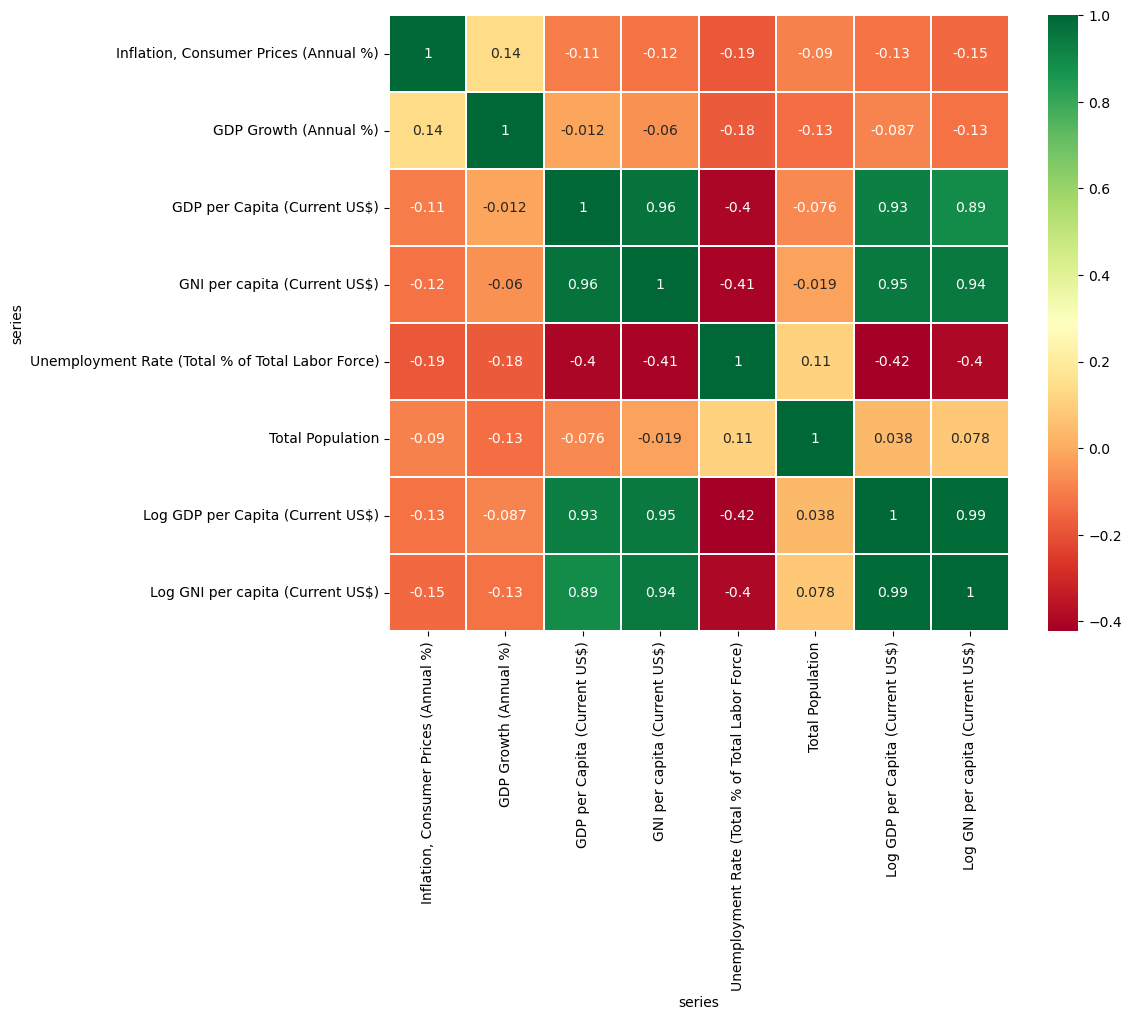

In [36]:
sns.heatmap(data_cleaned.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

GDP per Capita and GNI per capita:

There's a strong positive correlation between GDP per capita and GNI per capita (0.96). This is an expected outcome, as both are indicators of a country's economic health.
The log transformations of GDP and GNI per capita also show strong correlations with their non-log-transformed counterparts, showing that the transformation maintains their relationship while likely making the data more normally distributed.


Inflation, Consumer Prices (Annual percentage):

Inflation has a weak positive correlation with GDP growth (0.14), hinting that higher inflation doesn't consistently align with higher growth within this set of data.
There's a weak negative correlation between inflation and GDP per capita (-0.11) and GNI per capita (-0.12), suggesting that wealthier economies may experience slightly lower inflation, although the relationship is not stropng.

GDP Growth (Annual percentage):

GDP growth shows a small inverse correlation with the unemployment rate (-0.18), implying that higher GDP growth could be associated with lower unemployment, but the relationship is not strong.
There is also a negative correlation between GDP growth and total population (-0.13), which could suggest that larger populations are not necessarily associated with higher GDP growth rates in this dataset.
Moreover, there is moderate inverse correlation with Global Financial Crisis (-0.38) and Covid-19 crisis (-0.39).


Unemployment Rate (Total % of Total Labor Force):

The unemployment rate has a moderate inverse correlation with both GDP per capita (-0.4) and GNI per capita (-0.41), indicating that higher income per capita tends to coincide with lower unemployment rates.
Interestingly, unemployment rate has a weak positive correlation with total population (0.11), indicating that larger populations might have marginally higher unemployment rates, but the correlation is weak.


Total Population:

Total population shows very weak correlations with all economic indicators in this dataset, indicating that population size is not strongly related to these economic metrics.



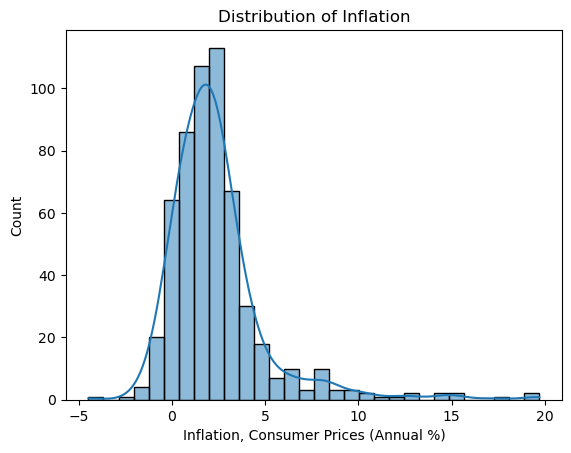

In [37]:
sns.histplot(data_cleaned['Inflation, Consumer Prices (Annual %)'], bins=30, kde=True)
plt.title('Distribution of Inflation')
plt.show()

The histogram shows that the inflation rates are mostly concentrated around the 0-5%, indicating that for most instances in the dataset, inflation is relatively low.
There appears to be a right skew in the data, with fewer instances occurring at higher inflation rates, which is confirmed by KDE line.

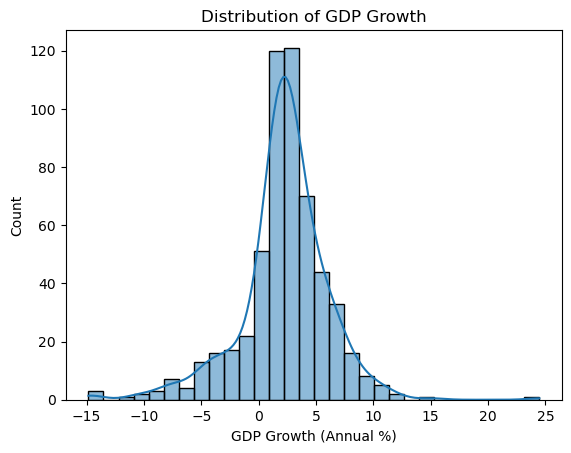

In [38]:
sns.histplot(data_cleaned['GDP Growth (Annual %)'], bins=30, kde=True)
plt.title('Distribution of GDP Growth')
plt.show()

The distribution of GDP growth rates appears to be somewhat symmetrical. The peak of the distribution is around the 0 to 5% growth rate. Similar to the inflation plot, the KDE curve shows a smooth distribution of GDP growth rates which are centered arount 0-5%.

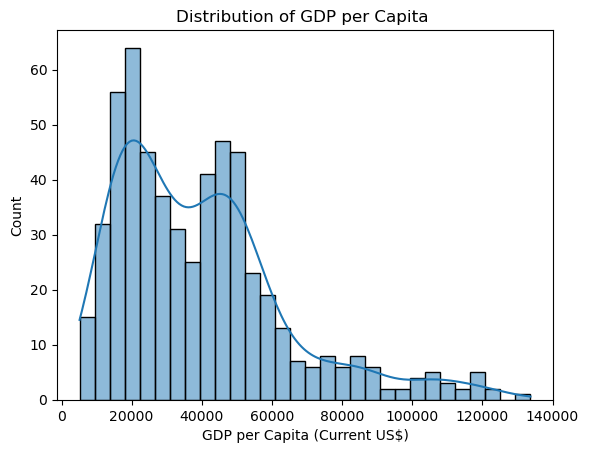

In [39]:
sns.histplot(data_cleaned['GDP per Capita (Current US$)'], bins=30, kde=True)
plt.title('Distribution of GDP per Capita ')
plt.show()

The plot shows a right-skewed distribution for GDP per Capita. This suggests that while most of the data points (countries or instances) have a lower GDP per Capita. Moreover, there are also fewer cases of high GDP per capita, which create a long tail on the right side of the histogram. The double peaks could suggest that there are two groups of countries or instances within the dataset: one group with a lower GDP per Capita and another with a higher GDP per Capita.

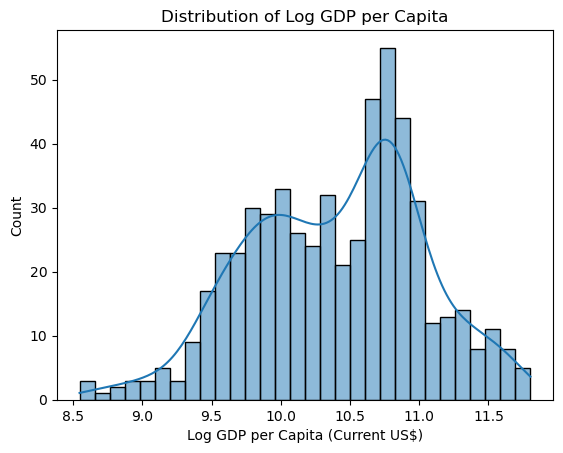

In [40]:
sns.histplot(data_cleaned['Log GDP per Capita (Current US$)'], bins=30, kde=True)
plt.title('Distribution of Log GDP per Capita')
plt.show()

The distribution appears to be more symmetric, indicating that the log transformation has somewhat helped to normalize the data. The tails on either side are less pronounced than in the original GDP per Capita distribution. The appearance of double peaks indicates that even on a logarithmic scale, there are two predominant groups in terms of economic prosperity.

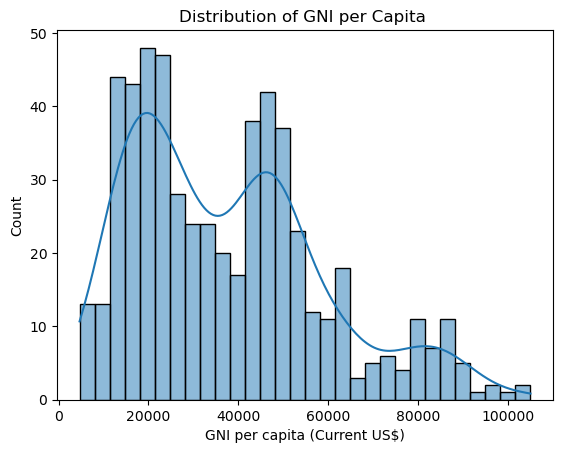

In [41]:
sns.histplot(data_cleaned['GNI per capita (Current US$)'], bins=30, kde=True)
plt.title('Distribution of GNI per Capita ')
plt.show()

The histogram for GNI per Capita shows a right-skewed distribution, with the majority of data points concentrated in the lower range of GNI values and fewer instances in the higher range, which is emphasized by KDE line. The plot shows multiple peaks possibly reflecting different levels of income or economic conditions.

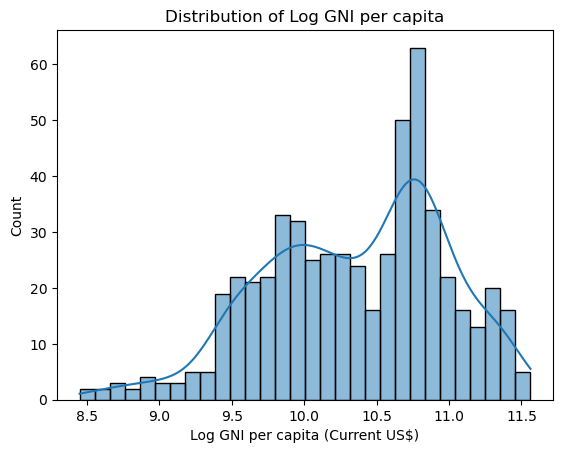

In [42]:
sns.histplot(data_cleaned['Log GNI per capita (Current US$)'], bins=30, kde=True)
plt.title('Distribution of Log GNI per capita')
plt.show()

In the log-transformed GNI per Capita plot, the distribution appears more symmetric. However, there are still indications of multiple peaks, suggesting presence of multiple groups in the dataset. 

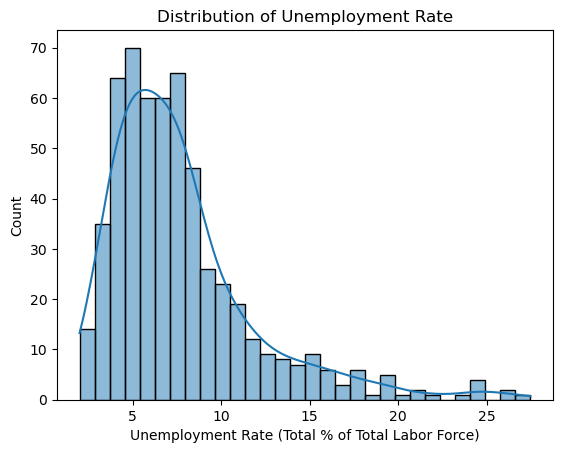

In [43]:
sns.histplot(data_cleaned['Unemployment Rate (Total % of Total Labor Force)'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.show()

The histogram for the unemployment rate shows a right-skewed distribution, with a high frequency of lower unemployment rates and fewer instances of very high unemployment rates. There's a long tail extending towards the higher unemployment rates, which suggests that while high unemployment is less common. 

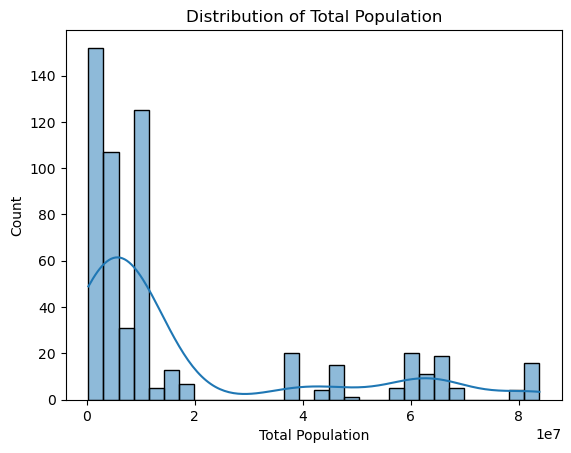

In [44]:
sns.histplot(data_cleaned['Total Population'], bins=30, kde=True)
plt.title('Distribution of Total Population')
plt.show()

The total population histogram is also right-skewed, with most of the data points concentrated in the lower range, indicating that the majority of the countries or instances in the dataset have small populations. Moreover, there is a long tail toward the larger population sizes. 

## Part 4: In-Depth analysis

In this section I will shift focus towards a deeper understanding of the economic dynamics within high-income European countries. After preparing and initially examining data, I now aim to answer three complex questions. These questions are carefully chosen to help us understand more about different economic measurements and how they depend on each other.

1) How do various economic and demographic factors differentially influence GDP per Capita and GNI per Capita in high-income European countries?
Sub-questions:

GDP per Capita Model:

Which factors (such as inflation rate, unemployment rate, total population) are significant predictors of GDP per Capita?
Does the model suggest that certain economic conditions are more conducive to higher GDP per Capita?


GNI per Capita Model:

Are the predictors for GNI per Capita similar to or different from those for GDP per Capita?
Can we identify unique factors that significantly influence GNI per Capita compared to GDP per Capita?
Comparative Analysis:

By comparing the regression models for GDP per Capita and GNI per Capita, what differences or similarities can we identify in the factors influencing these two indicators?
How do the coefficients and significances of predictors vary between the two models?

2) What is the relationship between economic growth, inflation, and unemployment within the context of high-income European economies?
Sub-questions:

Can we identify a pattern or trend that relates GDP Growth and Unemployment Rate inversely, as suggested by Okun's law, within these high-income European countries?
Is there a correlation between periods of low inflation and high GDP growth, indicating a possible Phillips curve relationship in this context?

3) How do economic crises differently affect lower-income and high-income groups within high-income European countries?
Sub-questions:

Impact on Employment:

How did unemployment rates change for lower-income versus high-income groups during and after major economic crises, such as the 2008 financial crisis and the COVID-19 pandemic?
Were there differences in the speed and extent of recovery in employment rates between these groups?


Changes in Income Levels:

How did income levels, as reflected by changes in GDP per Capita and GNI per Capita, differ between lower-income and high-income groups during economic downturns?
Did the income gap between these groups widen or narrow during and after the crises?


Inflation and Cost of Living:

How did inflation rates during economic crises impact the cost of living for lower-income groups compared to high-income groups?
Was there a notable difference in the ability of these groups to cope with inflationary pressures?

### Question 1: How do various economic and demographic factors differentially influence GDP per Capita and GNI per Capita in high-income European countries?

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
x = data_cleaned[['Inflation, Consumer Prices (Annual %)', 'Unemployment Rate (Total % of Total Labor Force)', 'Total Population']]
y_gdp = data_cleaned['Log GDP per Capita (Current US$)']  
y_gni = data_cleaned['Log GNI per capita (Current US$)']  

# Split the data into training/testing sets
X_train, X_test, y_gdp_train, y_gdp_test = train_test_split(x, y_gdp, test_size=0.2, random_state=0)
X_train, X_test, y_gni_train, y_gni_test = train_test_split(x, y_gni, test_size=0.2, random_state=0)

In [47]:
# Create linear regression object
regr_gdp = LinearRegression()

# Train the model using the training sets
regr_gdp.fit(X_train, y_gdp_train)

# Make predictions using the testing set
y_gdp_pred = regr_gdp.predict(X_test)

# The coefficients
print('Coefficients: \n', regr_gdp.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_gdp_test, y_gdp_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_gdp_test, y_gdp_pred))

Coefficients: 
 [-5.38278221e-02 -6.91675553e-02  1.36680867e-09]
Mean squared error: 0.30
Coefficient of determination: 0.23


In [48]:
# Create linear regression object
regr_gni = LinearRegression()

# Train the model using the training sets
regr_gni.fit(X_train, y_gni_train)

# Make predictions using the testing set
y_gni_pred = regr_gni.predict(X_test)

# The coefficients
print('Coefficients: \n', regr_gni.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_gni_test, y_gni_pred))
# The coefficient of determination
print('Coefficient of determination: %.2f' % r2_score(y_gni_test, y_gni_pred))


Coefficients: 
 [-5.58829908e-02 -6.64489486e-02  2.40253538e-09]
Mean squared error: 0.30
Coefficient of determination: 0.22


GDP per Capita Model Analysis
Significant Predictors:

In the GDP per Capita model, we find coefficients of -0.0538 (inflation rate), -0.0692 (unemployment rate), approximately 1.37e-09 (total population).
The negative coefficients for both inflation and unemployment suggest that higher rates of these indicators are associated with lower GDP per Capita. This means as inflation and unemployment increase, GDP per Capita tends to go down.
The coefficient for total population is positive but very close to zero, indicating positive impact on GDP per Capita, although it is almost negligible.

The mean squared error (MSE) of 0.28 and a coefficient of determination (R-squared) of 0.28 indicate that the model explains about 28% of the variability in GDP per Capita, indicating the presence of other influential factors not captured by the model.


GNI per Capita Model Analysis
Significant Predictors:

The coefficients for the GNI per Capita model are -0.0559 (inflation rate), -0.0664 (unemployment rate), and approximately 2.40e-09 (total population).
Similar to the GDP model, higher inflation and unemployment rates negatively impact GNI per Capita.
The total population's impact is again positive but very small.

The mean squared error (MSE) of 0.30 and the R-squared value for the GNI model is 0.22, close to that of the GDP model, suggesting a similar explanatory power. However, a significant portion of the variability in GNI per Capita remains unexplained by the predictors in the model.


Comparison with GDP per Capita Model:

The predictors for GNI per Capita are similar to those for GDP per Capita in terms of direction (positive or negative) but differ slightly in scale.
Both models suggest that economic environments with lower inflation and unemployment are better for higher per capita income.
The GNI model's R-squared is 0.22, similar to the GDP model, indicating that about 22% of the variability in GNI per Capita is explained by these predictors.
The total population has a minuscule positive impact in both models.

The R-squared values are close (0.23 for GDP and 0.22 for GNI), suggesting that the models have a similar level of explanatory power, but there is still a substantial amount of variability in GDP and GNI per Capita that is not explained by these three predictors alone.

In conclusion, both models reveal that lower inflation and unemployment rates are favorable for higher per capita income, aligning with standard economic theories. However, since the models do not account for all the variation in GDP and GNI per Capita, other factors like external economic conditions and government policies may also have significant roles. 

### Question 2: What is the relationship between economic growth, inflation, and unemployment within the context of high-income European economies?

#### Okun's Law Analysis

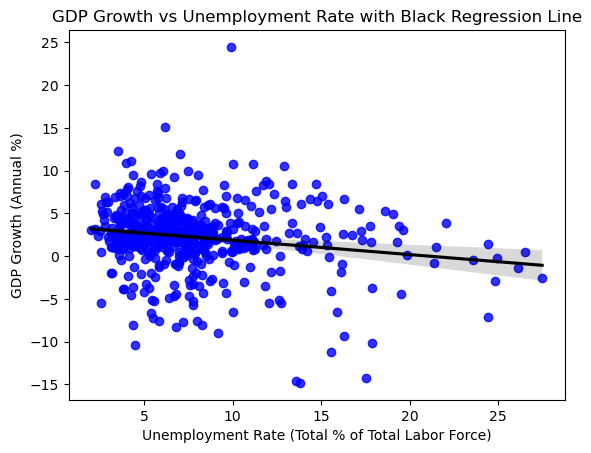

Correlation between GDP Growth and Unemployment Rate: -0.18120196607339237


In [49]:
# Scatter plot with regression line for GDP Growth vs Unemployment Rate
sns.regplot(data=data_cleaned, x='Unemployment Rate (Total % of Total Labor Force)', y='GDP Growth (Annual %)', color='blue', line_kws={'color': 'black'})
plt.title('GDP Growth vs Unemployment Rate with Black Regression Line')
plt.show()

# Calculating the correlation coefficient
correlation = data_cleaned['GDP Growth (Annual %)'].corr(data_cleaned['Unemployment Rate (Total % of Total Labor Force)'])
print(f"Correlation between GDP Growth and Unemployment Rate: {correlation}")

#### Phillips Curve Analysis

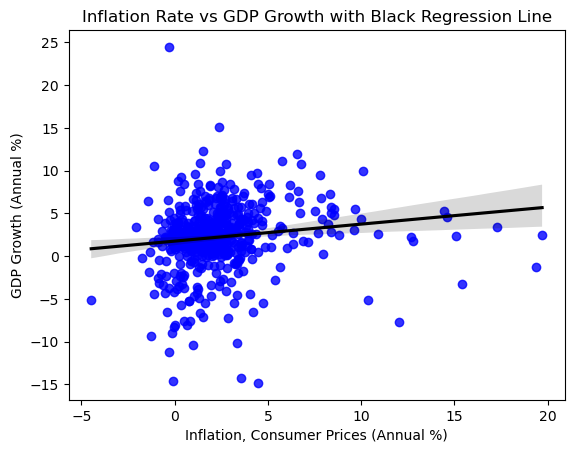

Correlation between Inflation Rate and GDP Growth: 0.13831009355347135


In [50]:
# Scatter plot with regression line for Inflation Rate vs GDP Growth
sns.regplot(data=data_cleaned, x='Inflation, Consumer Prices (Annual %)', y='GDP Growth (Annual %)', color='blue', line_kws={'color': 'black'})
plt.title('Inflation Rate vs GDP Growth with Black Regression Line')
plt.show()

# Calculating the correlation coefficient
correlation = data_cleaned['Inflation, Consumer Prices (Annual %)'].corr(data_cleaned['GDP Growth (Annual %)'])
print(f"Correlation between Inflation Rate and GDP Growth: {correlation}")

GDP Growth vs. Unemployment Rate
In the first plot we observe a distribution of points representing GDP growth as it relates to the unemployment rate. The correlation coefficient between GDP growth and the unemployment rate is approximately -0.18. This negative correlation suggests that there is an inverse relationship between the two variables, which is consistent with Okun's law. Okun's law posits that higher unemployment rates are often associated with lower GDP growth, as fewer people are employed and contributing to the economy's output. Although the relationship in the plot does not appear to be very strong (given the correlation is not very close to -1), the negative sign does indicate that, in general, as unemployment goes up, GDP growth tends to decrease, and vice versa.

Inflation Rate vs. GDP Growth
The second plot illustrates the relationship between the inflation rate and GDP growth, again with a black regression line. The correlation coefficient is approximately 0.14, indicating a weak positive relationship between inflation and GDP growth within the data. This is somewhat contrary to the traditional Phillips curve, which expects a negative correlation where high inflation correlates with lower unemployment (or increased GDP growth during economic expansion). However, the positive correlation found here could suggest that in high-income European economies, periods of heightened inflation could correspond with times of stronger economic activity and GDP growth.


Conclusions

Okun's Law: There is a weak inverse relationship between GDP growth and unemployment rate, which somewhat supports Okun's law in high-income European countries.

Phillips Curve: The expected negative relationship between inflation and unemployment (or positive between inflation and GDP growth) is not strongly supported. Instead, a weak positive correlation suggests a different dynamic in these countries, which could be influenced by various factors such as monetary policy, external economic conditions, or the unique structure of high-income economies.

It is critical to recognize that these simple linear analyses and do not take into account the complexity of economic relationships. Factors such as external shocks, policy changes, structural changes in the economy, and international trade dynamics can all influence these relationships.

### Question 3: How do economic crises differently affect lower-income and high-income groups within high-income European countries?

In [51]:
lower_income_countries = ['GRC', 'PRT', 'ESP']  # Example countries that might represent lower-income groups
higher_income_countries = ['DEU', 'FRA', 'NLD']  # Example countries that might represent higher-income groups

In [52]:
lower_income_data = data_cleaned[data_cleaned['Country'].isin(lower_income_countries)]
higher_income_data = data_cleaned[data_cleaned['Country'].isin(higher_income_countries)]

In [53]:
# Group the data by year and calculate the mean of the indicators for each year
lower_income_grouped = lower_income_data.groupby('Year').mean(numeric_only=True)
higher_income_grouped = higher_income_data.groupby('Year').mean(numeric_only=True)
lower_income_grouped = lower_income_grouped.reset_index()
higher_income_grouped = higher_income_grouped.reset_index()

#### Analysis of impact on employment

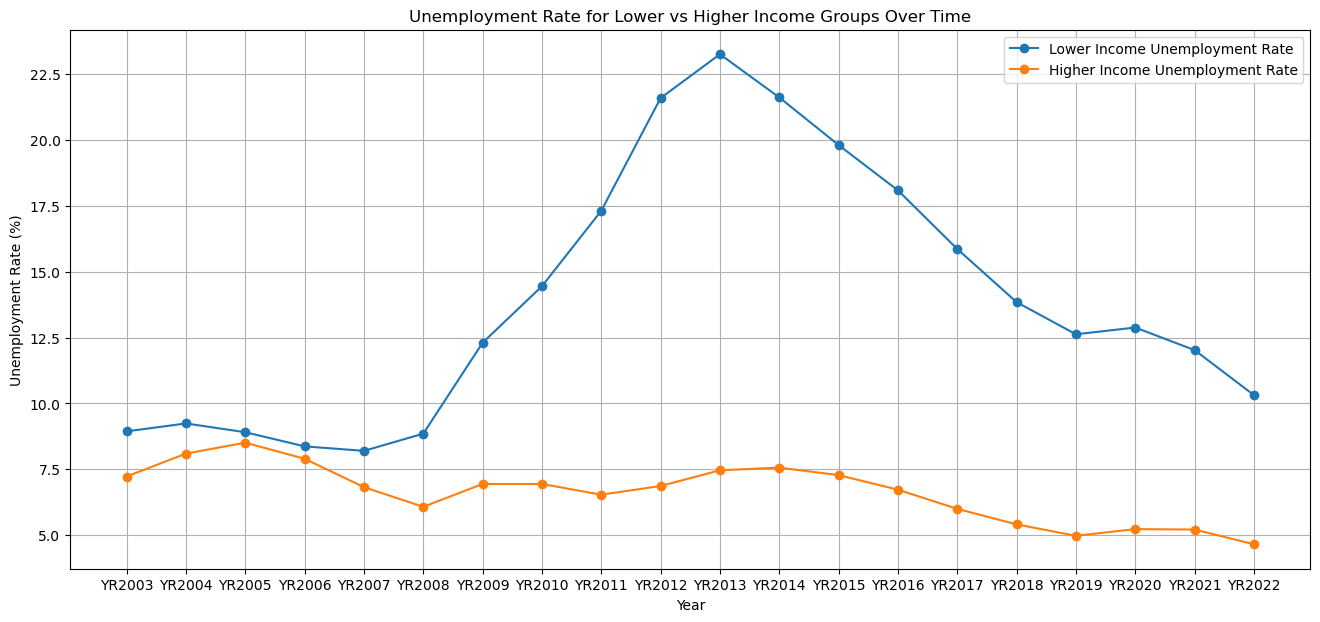

In [54]:
# Plot for Unemployment Rate
plt.figure(figsize=(16, 7))
plt.plot(lower_income_grouped['Year'], lower_income_grouped['Unemployment Rate (Total % of Total Labor Force)'], label='Lower Income Unemployment Rate', marker='o')
plt.plot(higher_income_grouped['Year'], higher_income_grouped['Unemployment Rate (Total % of Total Labor Force)'], label='Higher Income Unemployment Rate', marker='o')
plt.title('Unemployment Rate for Lower vs Higher Income Groups Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

The unemployment rate for the lower-income group spikes significantly during periods identified as economic crises (around 2009 and 2020). The peak unemployment rate for the lower-income group is substantially higher (above 20%) compared to the higher-income group (which remains below 10%). Post-crisis, the lower-income group’s unemployment rate appears to decline more slowly, indicating a slower recovery from the crisis. In contrast, the higher-income group shows a steadier and more rapid recovery. This substantial difference highlights the disproportionate impact economic crises have on employment within these two groups, which suggests that they are more vulnerable to economic downturns.

#### Analysis of impact on GDP per capita and GNI per capita

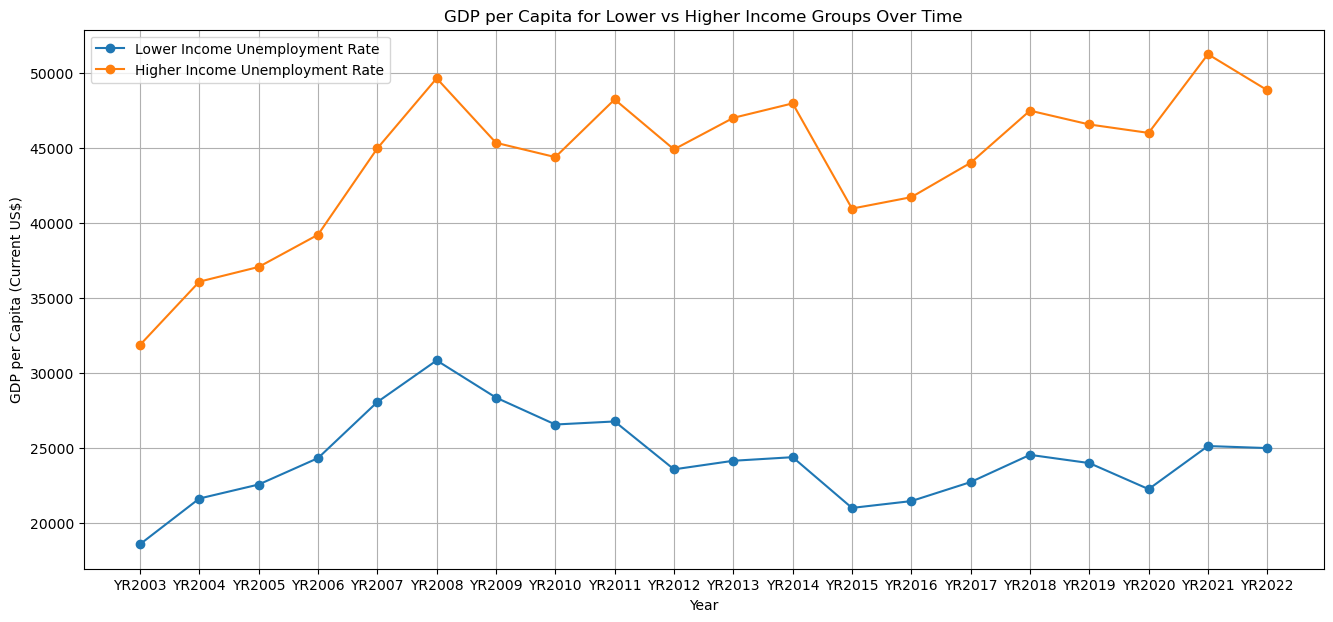

In [55]:
# Plot for Unemployment Rate
plt.figure(figsize=(16, 7))
plt.plot(lower_income_grouped['Year'], lower_income_grouped['GDP per Capita (Current US$)'], label='Lower Income Unemployment Rate', marker='o')
plt.plot(higher_income_grouped['Year'], higher_income_grouped['GDP per Capita (Current US$)'], label='Higher Income Unemployment Rate', marker='o')
plt.title('GDP per Capita for Lower vs Higher Income Groups Over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Current US$)')
plt.legend()
plt.grid(True)
plt.show()

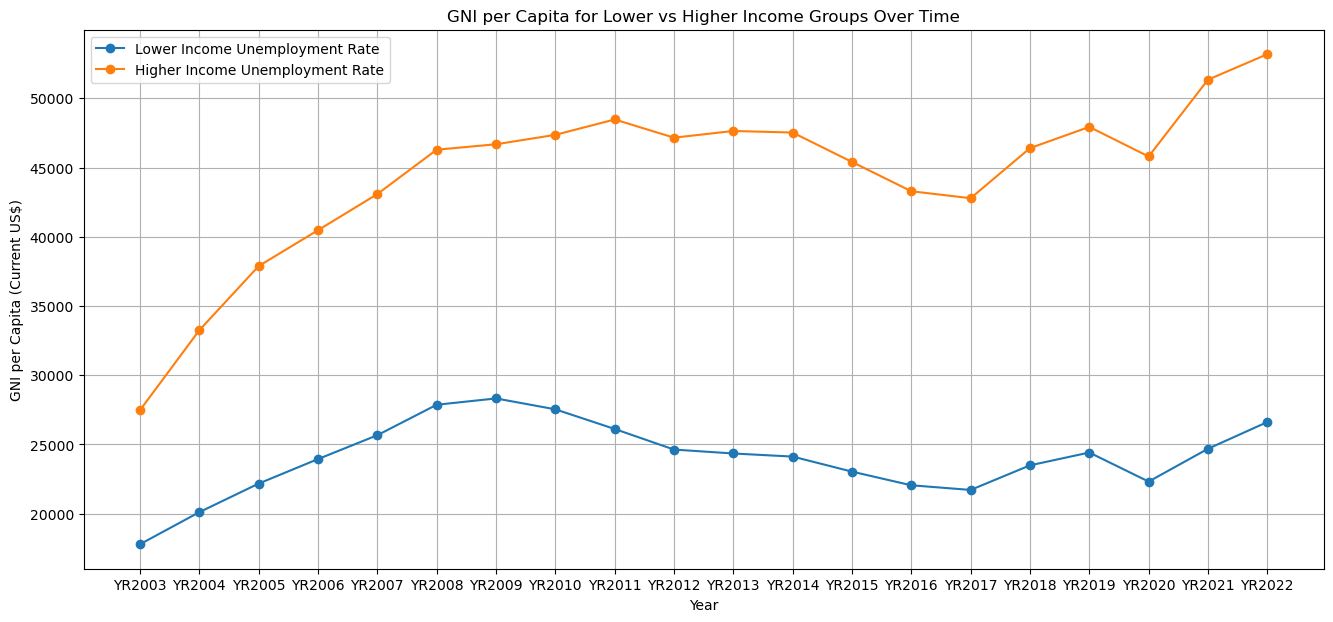

In [57]:
# Plot for Unemployment Rate
plt.figure(figsize=(16, 7))
plt.plot(lower_income_grouped['Year'], lower_income_grouped['GNI per capita (Current US$)'], label='Lower Income Unemployment Rate', marker='o')
plt.plot(higher_income_grouped['Year'], higher_income_grouped['GNI per capita (Current US$)'], label='Higher Income Unemployment Rate', marker='o')
plt.title('GNI per Capita for Lower vs Higher Income Groups Over Time')
plt.xlabel('Year')
plt.ylabel('GNI per Capita (Current US$)')
plt.legend()
plt.grid(True)
plt.show()

GDP per Capita for Lower vs Higher Income Groups Over Time:

The graph shows that the GDP per Capita for the higher-income group is consistently above that of the lower-income group, indicating a persistent income gap.
During the years of the global financial crisis (around 2008-2009), both groups experienced a decline in GDP per Capita, but the lower-income group seems experiencing more substantial decline, as indicated by the chart.
In the years following the crisis, GDP per Capita for the higher-income group recovers and even exceeds pre crisis years in 2021, while lower income group never recovers to pre-crisis levels.


GNI per Capita for Lower vs Higher Income Groups Over Time:

Similar to GDP per Capita, the GNI per Capita for the higher-income group is consistently higher.
The impact of economic crises on GNI per Capita is also more pronounced for the lower-income group, with a sharper decrease during economic downturns.
Post-crisis, the higher-income group's GNI per Capita shows signs of recovery and growth, a recovery that is not as evident in the lower-income group.


Impact of Crises on Income Levels:

It is apparent that both GDP per Capita and GNI per Capita are negatively impacted by economic downturns in both groups. However, lower-income groups suffer more significant setbacks, indicating a vulnerability to economic fluctuations.


Changes in the Income Gap:

The income gap between lower-income and higher-income groups appears to widen during economic crises. This is evidenced by the steeper decrease and slower recovery in the lower-income group's income levels.
After the crises, while the higher-income group's income levels show signs of recovery and even exceeding pre-crisis levels, the lower-income group does not experience a full recovery to pre-crisis levels, suggesting a lasting impact of the crisis on their economic well-being.


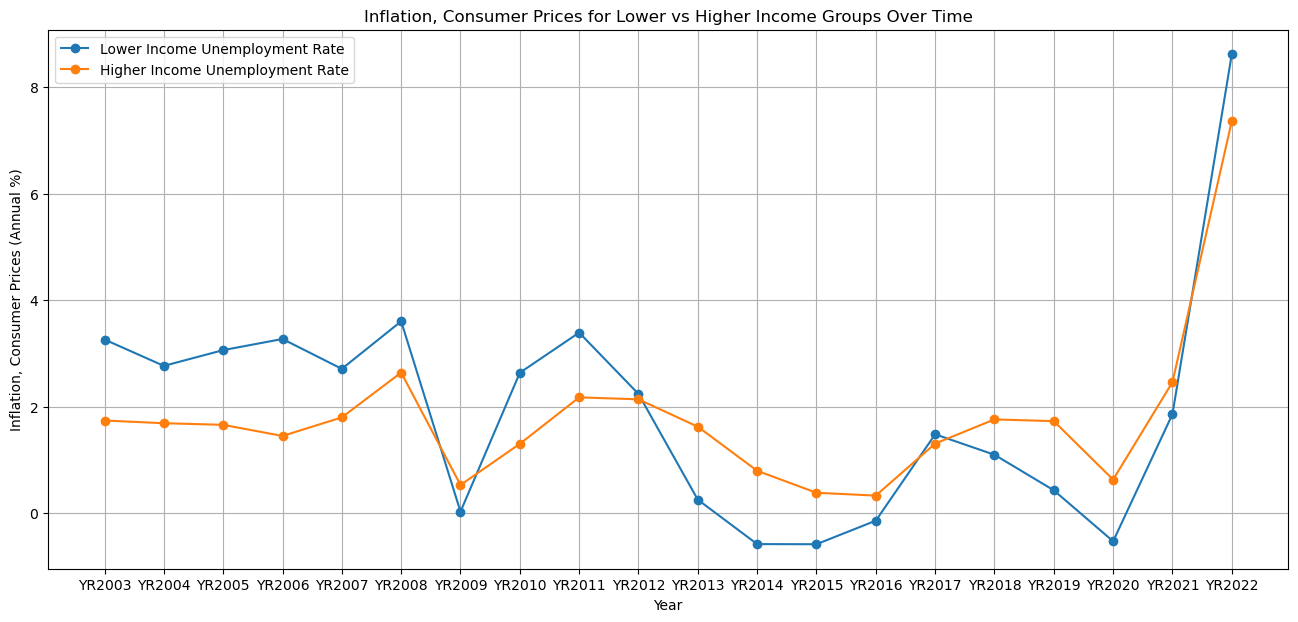

In [58]:
# Plot for Unemployment Rate
plt.figure(figsize=(16, 7))
plt.plot(lower_income_grouped['Year'], lower_income_grouped['Inflation, Consumer Prices (Annual %)'], label='Lower Income Unemployment Rate', marker='o')
plt.plot(higher_income_grouped['Year'], higher_income_grouped['Inflation, Consumer Prices (Annual %)'], label='Higher Income Unemployment Rate', marker='o')
plt.title('Inflation, Consumer Prices for Lower vs Higher Income Groups Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation, Consumer Prices (Annual %)')
plt.legend()
plt.grid(True)
plt.show()

Both lower and higher-income groups experience fluctuations in inflation rates over the years, often moving in sync. However, the lower-income group shows more volatility in inflation rates, with sharper increases and decreases, indicating potential instability in the cost of living for this group. This could imply that lower-income groups face more challenges in managing the cost of living during inflationary periods. Notably, during the years of major economic crises, such as the 2008 financial crisis and the COVID-19 pandemic in 2020, the lower-income group experienced significant spikes in inflation. This pattern suggests that this group is more vulnerable during times of economic stress.  The higher-income group also experiences increases in inflation during these crisis periods, but the peaks are less pronounced compared to the lower-income group. This could indicate that higher-income groups have more means to mitigate the impact of inflation.

In conclusion, the inflation rates during economic crises appear to impact lower-income groups more severely than higher-income groups

## Part 5: Summary

The analysis presented in this study offers insights into the complex economic landscape of high-income European countries.

Key Findings:

1) Economic and Demographic Influence: Our regression models for GDP per Capita and GNI per Capita revealed that both inflation and unemployment rates negatively influence these economic indicators. The data suggested that lower rates of inflation and unemployment are associated with higher income per capita. This aligns with established economic principles that link financial stability to increased wealth creation.

2) Economic Growth vs. Unemployment: The analysis found a weak inverse relationship between GDP growth and unemployment rates, offering some support to Okun's law within the context of high-income European nations. However, this relationship was not as strong as traditionally observed, pointing to the unique economic dynamics of these countries.

3) Inflation and Economic Growth: Contrary to the Phillips curve hypothesis, our study identified a weak positive correlation between inflation and GDP growth, suggesting that in these high-income European economies, periods of inflation might not necessarily deter economic expansion.

4) Impact of Economic Crises on Employment: The unemployment rates for lower-income groups spiked dramatically during the economic crises of 2008 and 2020, with a slower recovery post-crisis compared to higher-income groups. This underscores the disproportionate impact of economic downturns on more vulnerable populations.

5) Income Levels and Crises: Both GDP and GNI per Capita were adversely affected by economic downturns for all groups. Notably, lower-income groups experienced more pronounced declines and slower recoveries, highlighting their increased vulnerability to economic fluctuations and pointing to the widening of the income gap during crises.

Recommendations for Future Work

Further research could extend this work by incorporating additional variables that might influence the economic health of nations, such as trade balances, fiscal policies, and external economic shocks. Another valuable extension would be to analyze the role of government intervention and policy effectiveness in mitigating the impacts of economic crises.